# Ejercicio 20

## Enunciado
Crea un programa que:

1. Lea los datos referentes al conumo de alcohol por países.
2. Agrupe los datos por continente.
3. Realice una comparativa de los datos anteriores mediante un único gráfico de barras para cada tipo de bebida.

### ¿Qué cosas nuevas necesitamos saber?
- Agrupaciones de datos.

### Agrupaciones de datos.

Al igual que hacíamos manualmente en ejercicios anteriores, es habitual querer agrupar los datos en base a otras columnas y hacer cálculos con el resto de las mismas.

Veamos como hacer esto de una manera sencilla con pandas:

In [1]:
import pandas as pd

In [2]:
import random

In [3]:
# creamos datos de ejemplo
options = ['DOG', 'CAT', 'PARROT']

data = {
    'animal_type': [options[random.randint(0, 2)] for _ in range(100)],
    'animal_count': [random.randint(0, 2) for _ in range(100)]
}

animals = pd.DataFrame(data)
animals

,animal_type,animal_count
0,PARROT,0
1,CAT,0
2,DOG,1
3,DOG,1
4,PARROT,2
...,...,...
95,PARROT,1
96,DOG,2
97,CAT,2
98,PARROT,1


Como podemos observar, hemos generado un DataFrame con datos aleatorios donde la columna animal_type indica de que tipo de animal estamos hablando y la columna animl_count un conteo de los mismo.

Supongamos pues, que queremos conocer el número total contado de cada tipo de animal.

Es tan simple como:

In [4]:
# indicamos por que columna(s) queremos agrupar y que hacer con el resultado
# en este caso, sumarlo
animals.groupby('animal_type').sum()

,animal_count
animal_type,
CAT,38
DOG,36
PARROT,31


In [5]:
# podemos hacer lo mismo para la media
animals.groupby('animal_type').mean()

,animal_count
animal_type,
CAT,1.151515
DOG,1.200000
PARROT,0.837838


In [6]:
# también podemos hacer uso de nuestras propias funciones mediante lambdas
# y asignarle un nombre a la columna resultante de la siguiente manera

l_cuantos = lambda x: len(x)
l_suma = lambda x: sum(x)

animals.groupby('animal_type') \
       .agg(cuantos=('animal_count', l_cuantos),
            total=('animal_count', l_suma)
           )

,cuantos,total
animal_type,,
CAT,33,38
DOG,30,36
PARROT,37,31


Eso es todo, a por el ejercicio!

## Solución

**ANTES DE EMPEZAR**: Cómo has podido comprobar la teoría de hoy es sencilla. La parte complicada viene a la hora de hacer el gráfico, dónde el resultado ha de ser similar al que os dejo como referencia.

Tenéis todo lo necesario para hacer en [este enlace](https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py) lo cual no quiere decir que no haya que darle una pensada.

Por otra parte, observad los datos ya que, casualmente, Norte América viene como **NA** y es probable que suceda algo al leer el csv si únicamente le pasais la ruta del fichero al método correspondiente.

Recordad que podéis ver todos los parámetros en [este enlace](https://pandas.pydata.org/pandas-docs/stable/reference/io.html).

In [7]:
import pandas as pd

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
drinks = pd.read_csv('../Otros/bebidas.csv', index_col=0, keep_default_na=False)

In [10]:
continent_drinks = drinks.groupby('CONTINENT').sum()

In [11]:
continent_drinks

,BEER_SERVINGS,SPIRIT_SERVINGS,WINE_SERVINGS,TOTAL_LITRES_OF_PURE_ALCOHOL
CONTINENT,,,,
AF,3258,866,862,159.4
AS,1630,2677,399,95.5
EU,8720,5965,6400,387.8
NA,3345,3812,564,137.9
OC,1435,935,570,54.1
SA,2101,1377,749,75.7


In [12]:
cols_to_plot = [col for col in continent_drinks.columns if col.endswith('SERVINGS')] # etiquetas de los gráficos

In [13]:
continents = len(continent_drinks) # numero continentes

In [14]:
width = 1 / (continents + 1) # grosor de cada barra -> sumamos uno para la separación entre gráficos

In [15]:
begin_at = width/2 #la posición dónde se ha de pintar cada barra -> centrada respecto a la anchura

In [16]:
bars_position = [(i * width) + begin_at for i in range(continents)] # posicion de cada barra -> posición por anchura mas desplazamiento para centrarla

In [17]:
x = list(range(len(cols_to_plot))) # posiciones de X -> para cada continente pintamos tantas barras como tipos de bebida haya

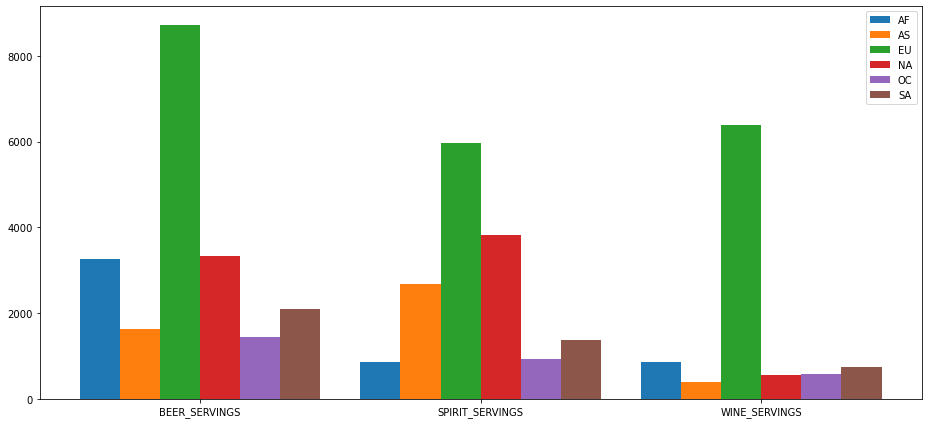

In [18]:
plt.figure(figsize=(13, 6))
# pintamos las 3 barras para cada continent
for i in range(continents):
    data_to_plot = list(continent_drinks.iloc[i])[:len(cols_to_plot)]
    x_pos = [n + bars_position[i] for n in x]
    plt.bar(x_pos, data_to_plot, width, label=continent_drinks.index[i])

# añadimos las etiquetas referentes al tipo de bebida
labels_at = [n + (sum(bars_position)/len(bars_position)) for n in range(len(cols_to_plot))]
plt.xticks(labels_at, cols_to_plot)
plt.legend()
plt.tight_layout()
plt.show()